# IQR Technique

In [43]:
import pandas as pd,numpy as np, matplotlib.pyplot as plt,seaborn as sns

In [44]:
data = pd.read_csv("placement.csv")
data.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


# Placement exam marks are the Non Distribution data

<AxesSubplot:xlabel='placement_exam_marks', ylabel='Count'>

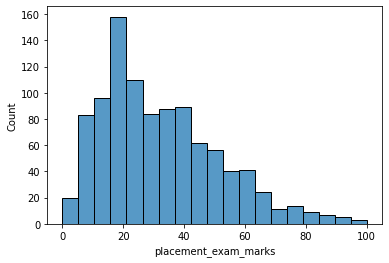

In [46]:
sns.histplot(data.placement_exam_marks)

In [61]:
# also check .skew() function
data.placement_exam_marks.skew()

0.8356419499466834

In [117]:
data.placement_exam_marks.describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

# box plot

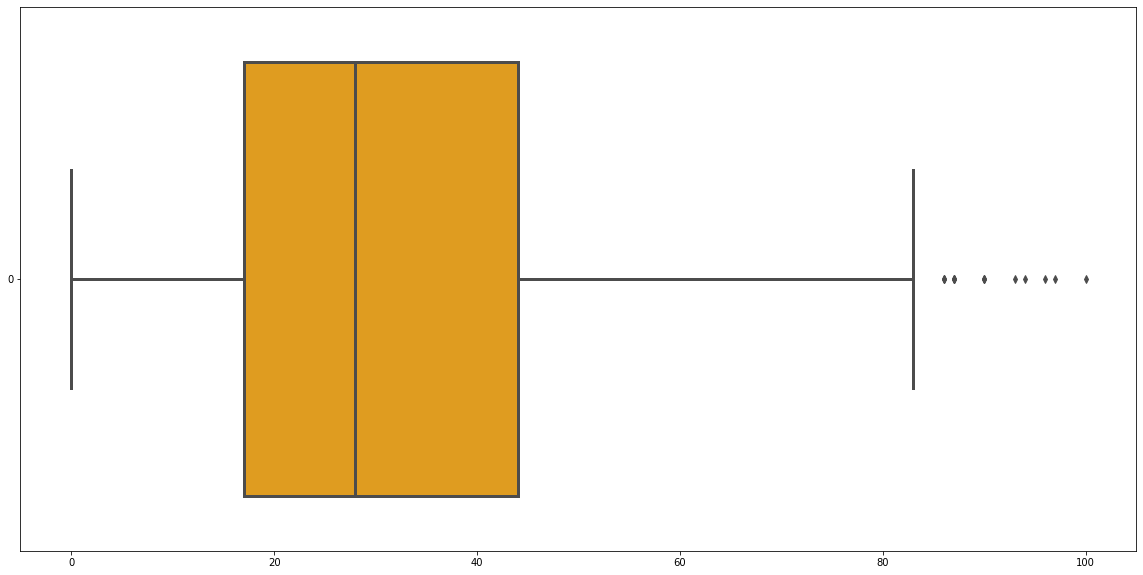

In [63]:
plt.figure(figsize=(20,10))
sns.boxplot(data=data.placement_exam_marks,orient="h",linewidth=3,color="orange")
plt.show()

# Find Q1,2,3,4 

In [129]:
q1 = np.percentile(data.placement_exam_marks,25)

In [130]:
# q2 also know as median
q2 = np.percentile(data.placement_exam_marks,50)

In [131]:
q3 = np.percentile(data.placement_exam_marks,75)

In [132]:
q4 = np.percentile(data.placement_exam_marks,100)

In [125]:
q1,q2,q3,q4

(17.0, 28.0, 44.0, 10.0)

17.0

## Find IQR


In [65]:
IQR = q3-q1
IQR

27.0

# IQR is the Difference of q1 and q3

<img src="pix/iqr.png">

# Select Boundary Upper and lower

In [68]:
upper = q3 + 1.5 * IQR
upper

84.5

In [69]:
lower = q1 - 1.5 * IQR
lower

-23.5

# Find Upper Outliers

In [72]:
data[data.placement_exam_marks > upper]

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


# Lower outlier

In [95]:
data[data.placement_exam_marks < lower]

,cgpa,placement_exam_marks,placed


# Trimming

In [88]:
new = data[data.placement_exam_marks < upper]

# Compare data

In [89]:
new.shape

(985, 3)

In [99]:
def graph(old,new):

    import scipy.stats as stats

    plt.figure(figsize=(20,10))

    plt.subplot(121)
    stats.probplot(old,plot=plt)
    plt.title("Before")

    plt.subplot(122)
    stats.probplot(new,plot=plt)
    plt.title("After")

    # box
    
    plt.figure(figsize=(20,10))

    plt.subplot(121)
    plt.title("Before")
    sns.boxplot(data=old,orient="h",linewidth=3,color="orange")

    plt.subplot(122)
    plt.title("After")
    sns.boxplot(data=new,orient="h",linewidth=3,color="skyblue")
    
    
    plt.figure(figsize=(20,10))

    plt.subplot(121)
    plt.title("Before")
    sns.histplot(data=old,linewidth=3,color="blue",kde=True,edgecolor="black")

    plt.subplot(122)
    plt.title("After")
    sns.histplot(data=new,linewidth=3,color="blue",kde=True,edgecolor="black")
    
    
    plt.figure(figsize=(20,10))

    plt.subplot(121)
    plt.title("Before")
    sns.scatterplot(x = old,y=old)

    plt.subplot(122)
    plt.title("After")
    sns.scatterplot(x = new,y=new)




    plt.show()

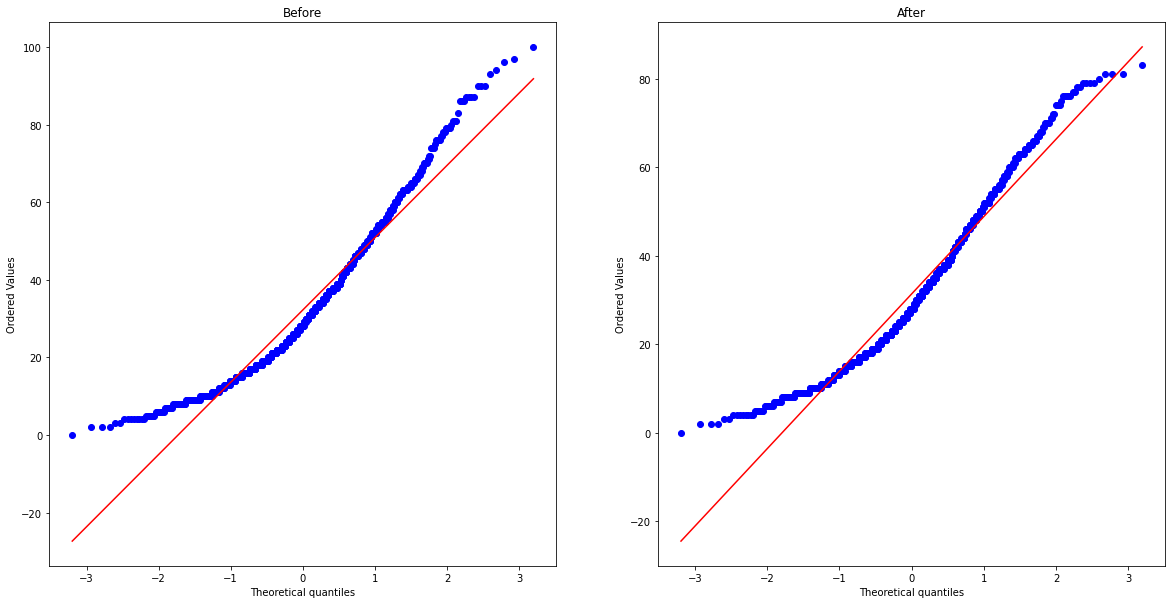

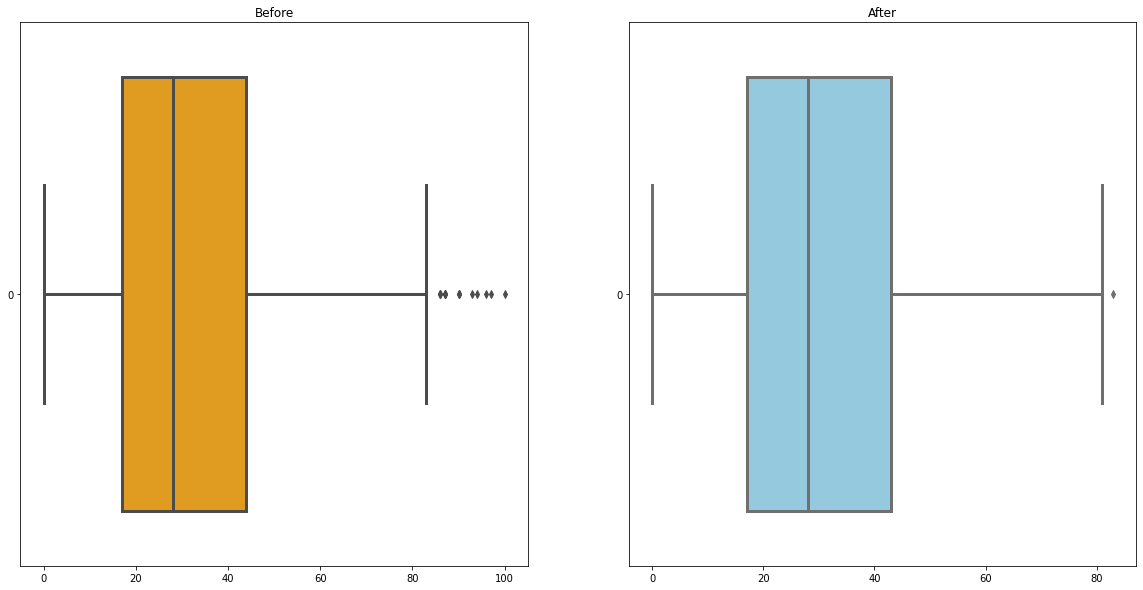

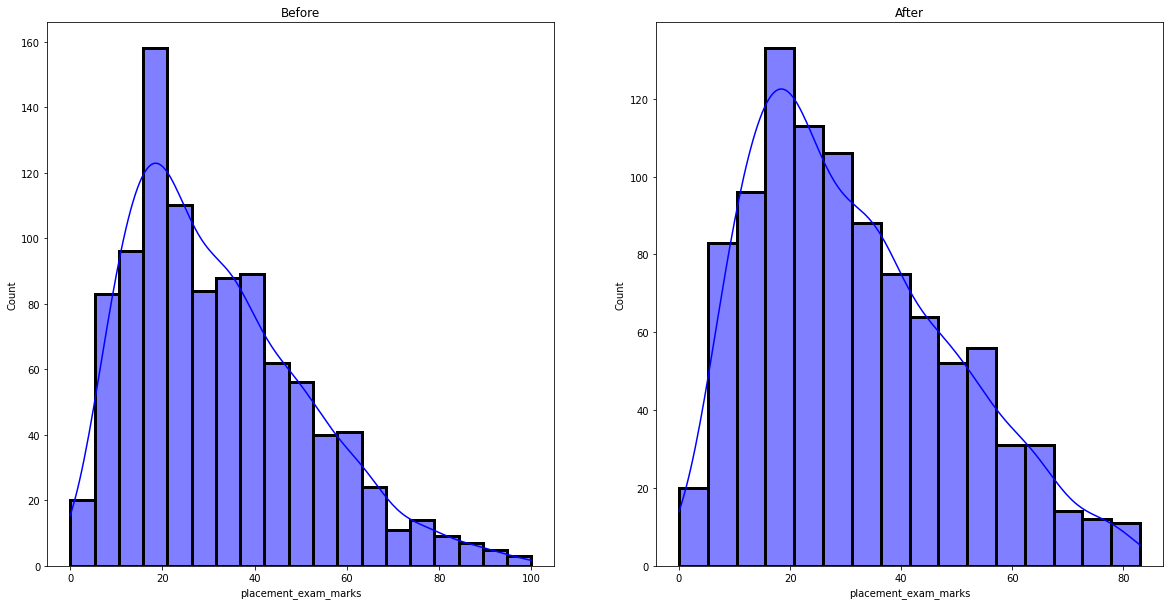

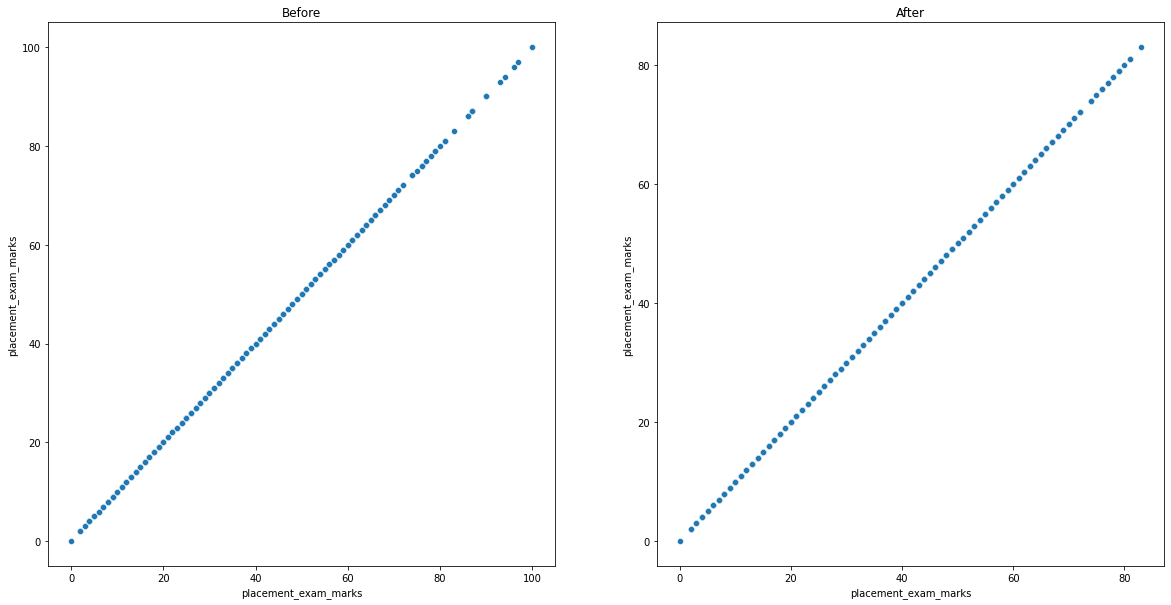

In [100]:
graph(data.placement_exam_marks,new.placement_exam_marks)

# Capping

In [108]:
cap = data.copy()

In [111]:
cap.placement_exam_marks

0      26.0
1      38.0
2      40.0
3       8.0
4      17.0
       ... 
995    44.0
996    65.0
997    34.0
998    46.0
999    10.0
Name: placement_exam_marks, Length: 1000, dtype: float64

In [113]:
cap["placement_exam_marks"] = np.where(
    
    cap["placement_exam_marks"] > upper,upper,
        
    np.where(
            cap["placement_exam_marks"] < lower,lower,
            cap["placement_exam_marks"]
        )
    

)
cap

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


# Compare

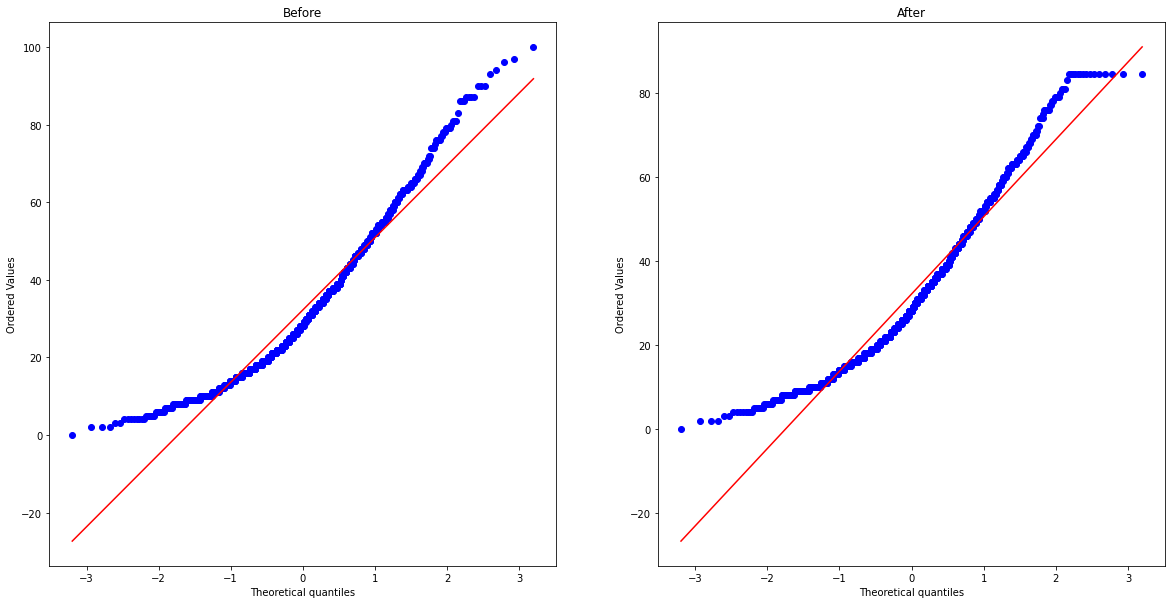

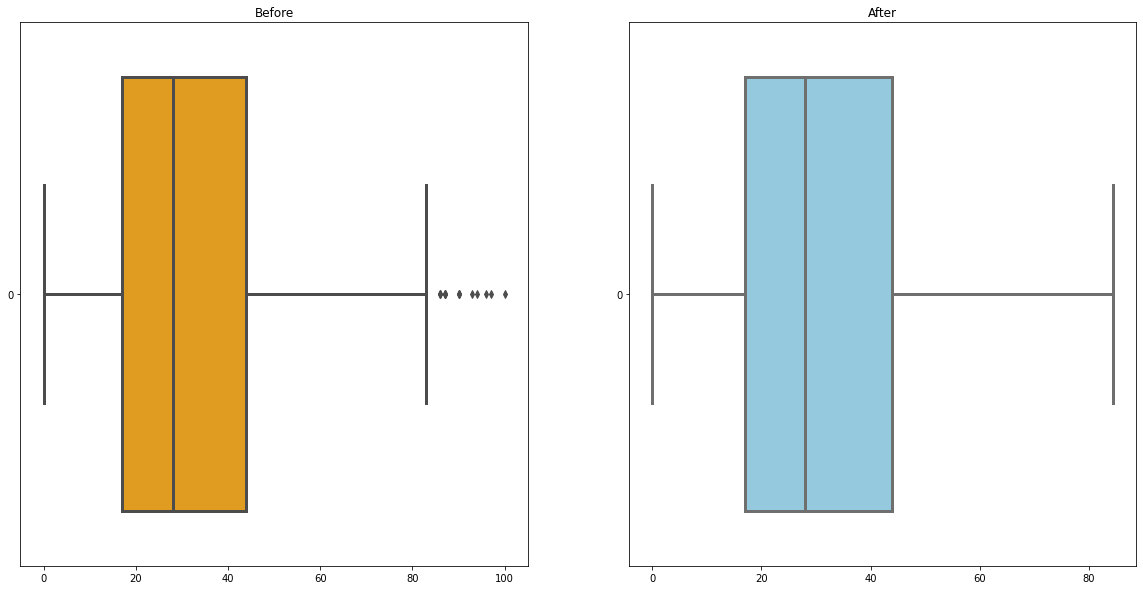

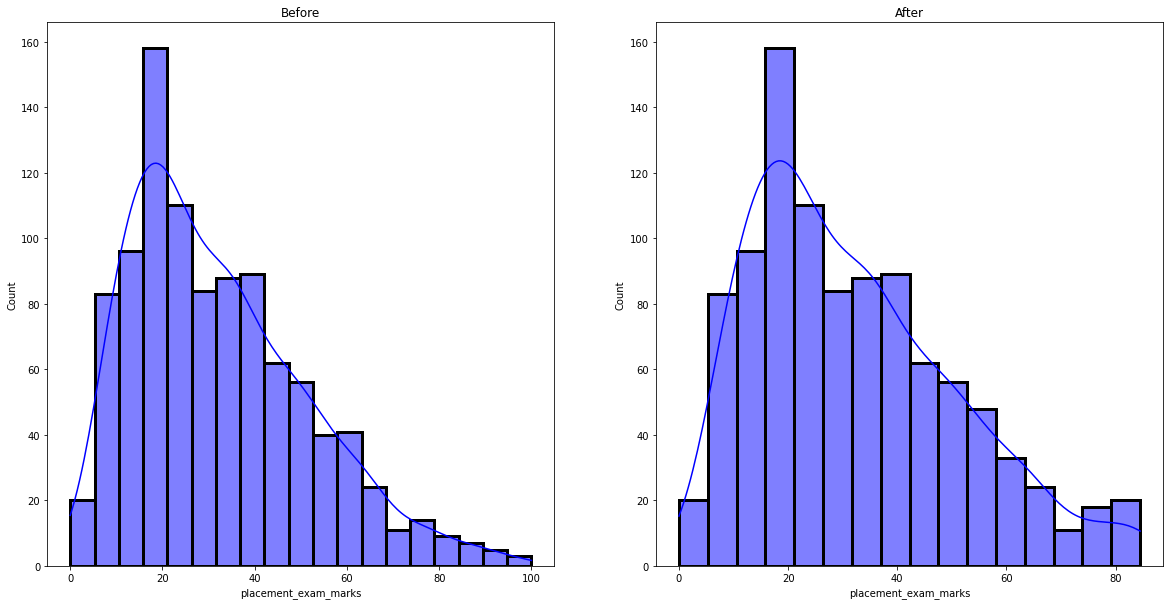

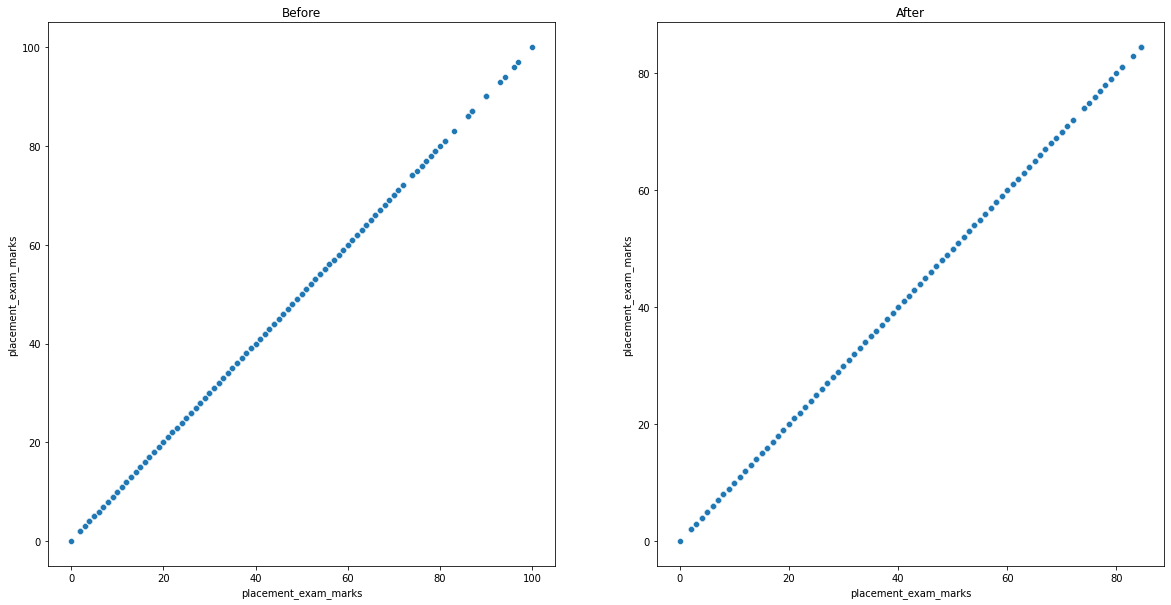

In [114]:
graph(data.placement_exam_marks,cap.placement_exam_marks)

# Compare Triming and Capping on Boxplot

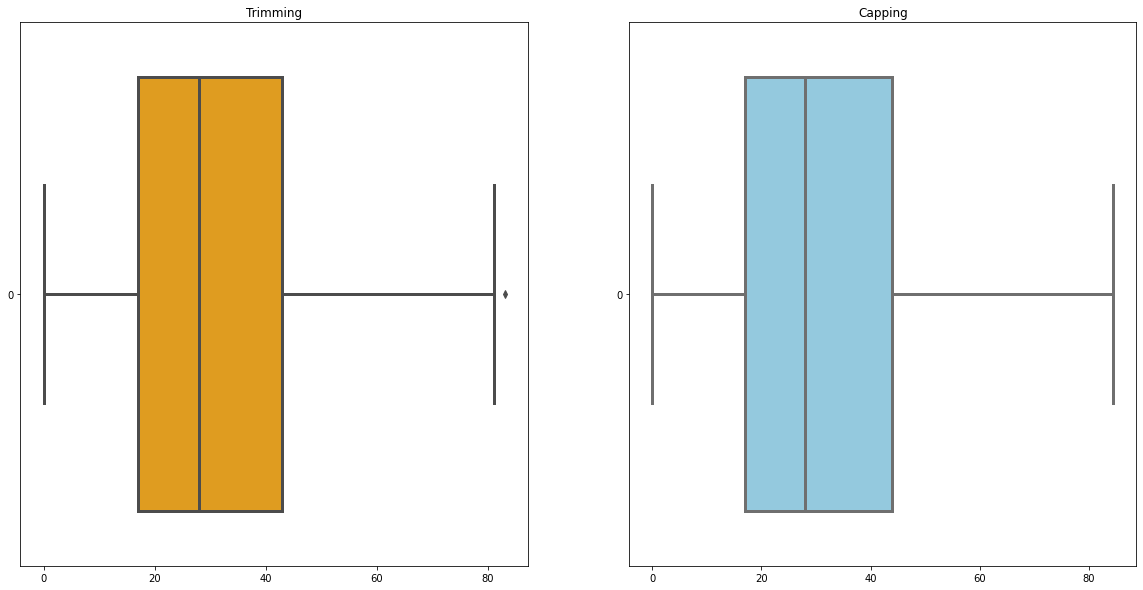

In [116]:
plt.figure(figsize=(20,10))

plt.subplot(121)
plt.title("Trimming")
sns.boxplot(data=new.placement_exam_marks,orient="h",linewidth=3,color="orange")

plt.subplot(122)
plt.title("Capping")
sns.boxplot(data=cap.placement_exam_marks,orient="h",linewidth=3,color="skyblue")
plt.show()
